In [3]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
from sqlalchemy import create_engine, inspect
import seaborn as sns

In [4]:
import numpy as np
import pandas as pd

In [5]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [6]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
import datetime as dt

In [7]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [8]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [9]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [10]:
Base.classes.keys()

['measurement', 'station']

In [11]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [12]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [13]:
# Create the inspector and connect it to the engine
inspector = inspect(engine)

In [14]:
inspector.get_table_names()

['measurement', 'station']

In [15]:
# Using the inspector to print the column names within the 'dow' table and its types
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [16]:
# data = engine.execute("select date from measurement where date = 08/23/2016 ")

# Query All Records in the the Database
data = engine.execute("SELECT * FROM measurement where date between '2016-08-24' and '2017-08-23'")

for record in data:
    print(record)

(2365, 'USC00519397', '2016-08-24', 0.08, 79.0)
(2366, 'USC00519397', '2016-08-25', 0.08, 80.0)
(2367, 'USC00519397', '2016-08-26', 0.0, 79.0)
(2368, 'USC00519397', '2016-08-27', 0.0, 77.0)
(2369, 'USC00519397', '2016-08-28', 0.01, 78.0)
(2370, 'USC00519397', '2016-08-29', 0.0, 78.0)
(2371, 'USC00519397', '2016-08-30', 0.0, 79.0)
(2372, 'USC00519397', '2016-08-31', 0.13, 80.0)
(2373, 'USC00519397', '2016-09-01', 0.0, 81.0)
(2374, 'USC00519397', '2016-09-02', 0.0, 80.0)
(2375, 'USC00519397', '2016-09-03', 0.0, 79.0)
(2376, 'USC00519397', '2016-09-04', 0.03, 75.0)
(2377, 'USC00519397', '2016-09-05', None, 79.0)
(2378, 'USC00519397', '2016-09-06', None, 76.0)
(2379, 'USC00519397', '2016-09-07', 0.05, 76.0)
(2380, 'USC00519397', '2016-09-08', 0.0, 80.0)
(2381, 'USC00519397', '2016-09-09', 0.03, 79.0)
(2382, 'USC00519397', '2016-09-10', 0.0, 78.0)
(2383, 'USC00519397', '2016-09-11', 0.05, 76.0)
(2384, 'USC00519397', '2016-09-12', 0.0, 78.0)
(2385, 'USC00519397', '2016-09-13', 0.02, 78.0)
(2

(12135, 'USC00519523', '2017-06-25', 0.0, 80.0)
(12136, 'USC00519523', '2017-06-26', 0.0, 81.0)
(12137, 'USC00519523', '2017-06-27', 0.0, 81.0)
(12138, 'USC00519523', '2017-06-28', 0.0, 79.0)
(12139, 'USC00519523', '2017-06-29', 0.0, 78.0)
(12140, 'USC00519523', '2017-06-30', 0.07, 75.0)
(12141, 'USC00519523', '2017-07-02', None, 80.0)
(12142, 'USC00519523', '2017-07-03', 0.02, 81.0)
(12143, 'USC00519523', '2017-07-05', None, 80.0)
(12144, 'USC00519523', '2017-07-06', 0.0, 79.0)
(12145, 'USC00519523', '2017-07-07', 0.0, 79.0)
(12146, 'USC00519523', '2017-07-08', 0.0, 77.0)
(12147, 'USC00519523', '2017-07-09', 0.0, 82.0)
(12148, 'USC00519523', '2017-07-10', 0.0, 82.0)
(12149, 'USC00519523', '2017-07-11', 0.0, 79.0)
(12150, 'USC00519523', '2017-07-12', 0.0, 82.0)
(12151, 'USC00519523', '2017-07-13', 0.11, 79.0)
(12152, 'USC00519523', '2017-07-14', 0.0, 80.0)
(12153, 'USC00519523', '2017-07-15', 0.0, 82.0)
(12154, 'USC00519523', '2017-07-16', 0.0, 82.0)
(12155, 'USC00519523', '2017-07-17'

# Exploratory Climate Analysis

In [20]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
    # Calc the 12 month parameters
    
# Calculate the date 1 year ago from the last data point in the database

    # Last known data of data
max_date =[]

data2= engine.execute("select max(date) from measurement")
for record in data2:
    max_date= record
#"2017-08-23"

    #one year prior
query_date = dt.date(2017,8,23) - dt.timedelta(weeks=52)
print("Query Date:", query_date)

# 2016-08-24
    
# Perform a query to retrieve the data and precipitation scores
data_all = []
data = engine.execute("SELECT * FROM measurement where date between '2016-08-24' and'2017-08-23'")
for record in data:
    data_all.append(record)
data_all

# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(data_all, columns=['id', 'station', 'date', 'prcp', 'tobs'])
df.set_index('date', inplace=True)

# Sort the dataframe by date
df2=df.sort_values('date').fillna(0)
df2.head(40)
# Use Pandas Plotting with Matplotlib to plot the data

bar_x = df2.index
bar_y= df2.prcp
bar_label = "Date"
# plt.show()


Query Date: 2016-08-24


Text(0.5, 1.0, 'Precipitation Data')

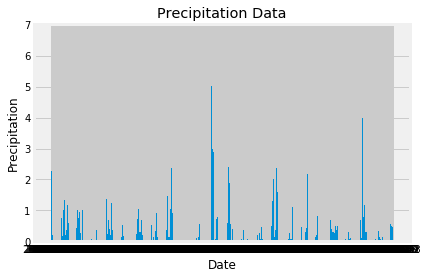

In [21]:
plt.bar(bar_x,bar_y,width=.5)
plt.xlabel('Date')
plt.ylabel('Precipitation')
plt.title("Precipitation Data")


# Exploratory Climate Analysis

In [173]:
# Use Pandas to calcualte the summary statistics for the precipitation data
summary=df['prcp'].describe()
summary.to_frame(name='precipitation')

,precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [20]:
# Design a query to show how many stations are available in this dataset?
Sta_ct =[]
data_sta= engine.execute("select count(distinct station) as Sta from measurement")
for record in data_sta:
    Sta_ct.append(record)

print("There are " + str(Sta_ct) + " stations in the dataset")
    
    

There are [(9,)] stations in the dataset


In [22]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

data_sta= engine.execute("select station, count(tobs)  from measurement \
                         group by station order by count(tobs) desc ")
for record in data_sta:
    print(record)

('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


In [23]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?

data_sta_sum= engine.execute("select station, count(tobs), min(tobs), max(tobs), avg(tobs)  from measurement \
                         group by station order by count(tobs) desc ")
for record in data_sta_sum:
    print(record)

('USC00519281', 2772, 54.0, 85.0, 71.66378066378067)
('USC00519397', 2724, 56.0, 87.0, 74.55323054331865)
('USC00513117', 2709, 59.0, 85.0, 72.68918420081211)
('USC00519523', 2669, 56.0, 85.0, 74.5436493068565)
('USC00516128', 2612, 58.0, 84.0, 70.91500765696784)
('USC00514830', 2202, 58.0, 85.0, 74.8732970027248)
('USC00511918', 1979, 53.0, 87.0, 71.61596766043456)
('USC00517948', 1372, 58.0, 87.0, 74.68440233236151)
('USC00518838', 511, 58.0, 83.0, 72.72407045009784)


In [34]:
# Choose the station with the highest number of temperature observations.
data_sta_max= engine.execute("select station, max(tobs) from measurement")

for record in data_sta_max:
    print(record)

#('USC00519397', 87.0)

# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

data_sta_max_df=[]

data_sta_max12= engine.execute("select date, station, tobs from measurement \
                                 where station ='USC00519281' \
                                 and date between '2016-08-24' and'2017-08-23' \
                                 order by date desc" )

for record in data_sta_max12:
    data_sta_max_df.append(record)

# Save the query results as a Pandas DataFrame 
df_max = pd.DataFrame(data_sta_max_df, columns=['date','station', 'tobs'])

# df_max.set_index('station', inplace=True)



('USC00519397', 87.0)


In [35]:
df_max

,date,station,tobs
0,2017-08-18,USC00519281,79.0
1,2017-08-17,USC00519281,76.0
2,2017-08-16,USC00519281,76.0
3,2017-08-15,USC00519281,77.0
4,2017-08-14,USC00519281,77.0
5,2017-08-13,USC00519281,77.0
6,2017-08-06,USC00519281,83.0
7,2017-08-05,USC00519281,82.0
8,2017-08-04,USC00519281,77.0
9,2017-07-31,USC00519281,76.0


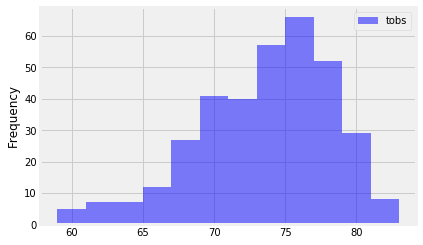

In [36]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
x = df_max['tobs'].values
num_bins = 12
n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.5, label='tobs')
plt.legend(loc='upper right')

plt.ylabel('Frequency')


plt.show()

In [38]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [39]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
print(calc_temps('2011-02-28','2011-03-05'))

[(61.0, 69.75510204081633, 75.0)]


In [42]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

x1 = calc_temps('2011-02-28', '2011-03-05')
x1

[(61.0, 69.75510204081633, 75.0)]

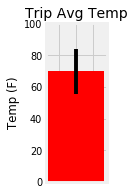

In [45]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


w = 1
h = 3
d = 70
plt.figure(figsize=(w, h), dpi=d)
means = y[0][1]
#plt.ylim(means + 20)
positions = [1]
std = y[0][2] - y[0][0]

plt.tick_params(
    axis='x',          
    which='both',      
    bottom=False,      
    top=False,         
    labelbottom=False) 


plt.ylabel('Temp (F)')
plt.title('Trip Avg Temp')

plt.bar(positions, means, color="red", yerr=std)
plt.ylim(0, 100)
plt.show()

In [49]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

connection = engine.connect()

vSQL = "SELECT m.station, s.name,s.latitude,s.longitude, s.elevation, sum(m.prcp) \
               from measurement as m, station as s \
               WHERE m.station = s.station\
               AND (date >= Datetime('2011-02-28') \
               AND date <= Datetime('2011-03-05'))\
               GROUP BY m.station\
               ORDER BY sum(prcp) DESC"


#AND (date >= Datetime('2011-02-28 00:00:00') \
#AND date <= Datetime('2011-03-05 00:00:00'))\


df_rainfall = pd.read_sql_query(vSQL,con=connection)


df_rainfall


,station,name,latitude,longitude,elevation,sum(m.prcp)
0,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6,2.33
1,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9,2.23
2,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5,2.17
3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0,1.96
4,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4,1.45
5,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6,1.44
6,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0,1.38
7,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9,0.63
8,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9,NaN


## Optional Challenge Assignment